In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [4]:
data = pd.read_csv('Mall_Customers.csv')
X = data.iloc[:, [3,4]].values

In [5]:
sc = StandardScaler()
X_scale = sc.fit_transform(X)

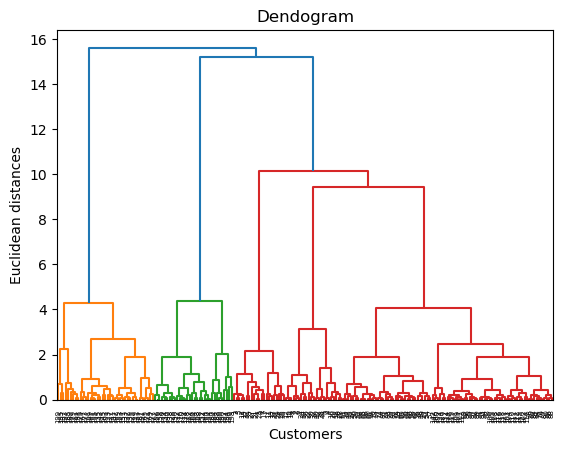

In [6]:
import scipy.cluster.hierarchy as sh
# Calcula a ligação hierárquica dos dados X usando o método de Ward, que minimiza a variância dentro dos clusters.
# O resultado é uma matriz que representa as distâncias entre cada par de observações em um formato adequado para criar o dendrograma.
linkage_matrix = sh.linkage(X_scale, method='ward')

# Cria o dendrograma usando a matriz de ligação calculada, permitindo visualizar as divisões hierárquicas entre os dados.
# O dendrograma é uma representação gráfica que mostra a relação entre os clusters e ajuda a identificar o número ideal de clusters.
dendrogram = sh.dendrogram(linkage_matrix)

plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

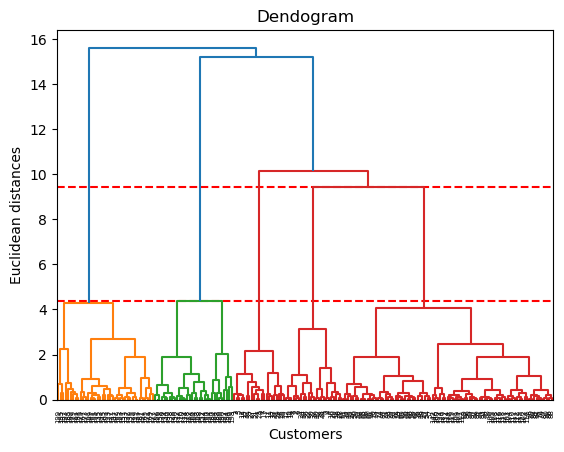

In [12]:
def max_distance_boundaries(linkage_matrix: np.ndarray) -> [int, int]:
    # Inicializa a variável para armazenar a maior diferença
    maxDiff = -1
    
    # Loop através da matriz de ligação, exceto o último elemento
    for i in range(len(linkage_matrix) - 1):
        nextItemData = linkage_matrix[i + 1]  # Obtém os dados da próxima ligação
        data = linkage_matrix[i]               # Obtém os dados da ligação atual
        
        # Calcula a diferença entre as distâncias de ligação
        diff = nextItemData[2] - data[2] 
        
        # Se a diferença atual for maior que a máxima registrada
        if diff > maxDiff:
            maxDiff = diff  # Atualiza a maior diferença encontrada
            # Armazena a diferença e os dados relevantes
            maxDiffData = [diff, i, data[2], nextItemData[2], data, nextItemData]

    # Retorna as distâncias que correspondem aos limites máximos encontrados
    return [maxDiffData[2], maxDiffData[3]] if maxDiffData is not None else []


# Gera a matriz de ligação usando o método de Ward (alterar X conforme necessário)
linkage_matrix = sh.linkage(X_scale, method="ward")

# Calcula os limites máximos de distância a partir da matriz de ligação
max_distance = max_distance_boundaries(linkage_matrix)

# Para cada limite de distância encontrado, desenha uma linha horizontal no gráfico
for boundary in max_distance:
    plt.axhline(y=boundary, color='r', linestyle='--')

# Gera e exibe o dendrograma com as ligações
dendrogram = sh.dendrogram(linkage_matrix)
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [18]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, linkage = 'ward') # Ward serve para agrupamento hierarquico de modo bem compacto
y_hc = hc.fit_predict(X_scale) # Crias as var y

In [22]:
X_new = sc.inverse_transform(X_scale)

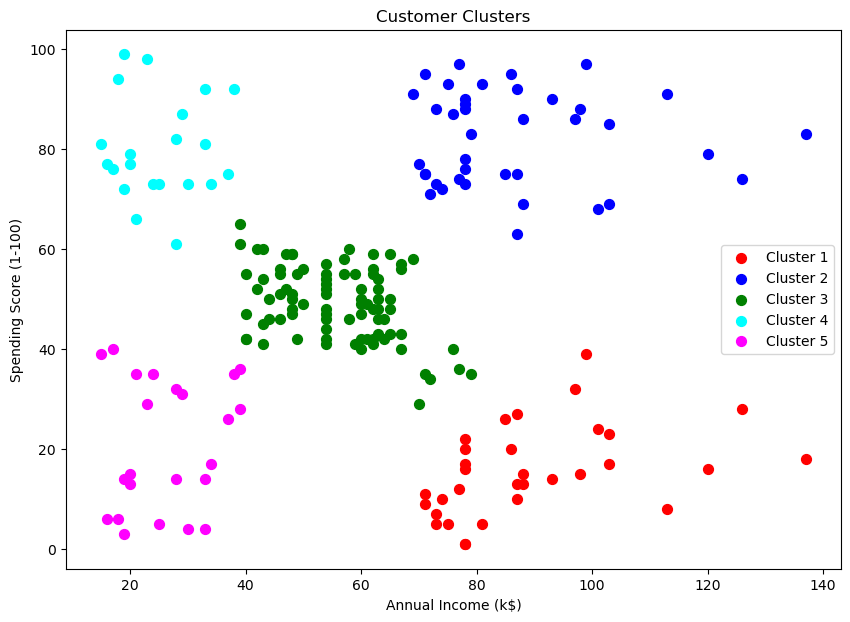

In [54]:
plt.figure(figsize=(10, 7))

colors = ['red', 'blue', 'green', 'cyan', 'magenta', 'yellow', 'black', 'orange']

for i in range(5):
    plt.scatter(X_new[y_hc == i, 0], X_new[y_hc == i, 1], 
                s=50, color=colors[i], label=f'Cluster {i+1}')

plt.title('Customer Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()